<a href="https://colab.research.google.com/github/DivyaNarayan0613/DivyaNarayan0613/blob/main/Arnold_Cat_Encryption_Using_ANN_pdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is inspired from the following


https://www.codershubb.com/encrypt-or-decrypt-any-image-using-python/


https://programming.vip/docs/

opencv-implementation-of-image-encryption-and-decryption.html


https://github.com/aarya-arun/Chaotic-Map-Image-Encrpytion/blob/master/Henon_Cat_Logistic.ipynb


https://www.kaggle.com/code/rahuldshetty/image-encryption-and-decryption


https://github.com/arulthileeban/SAE-Encryption/blob/master/keras_code.py


https://github.com/pranjalsrv/Encoder-Decoder/blob/master/Encoder_decoder.ipynb


https://github.com/sssohrab/sparsifying_groups_imAmbiguation/blob/master/models.py


https://medium.com/theleanprogrammer/denoising-images-using-autoencoders-4a64499f10ba


https://www.analyticsvidhya.com/blog/2020/02/what-is-autoencoder-enhance-image-resolution/


https://keras.io/examples/vision/autoencoder/


https://machinelearningmastery.com/a-gentle-introduction-to-channels-first-and-channels-last-image-formats-for-deep-learning/

Citation
[1]. https://en.wikipedia.org/wiki/Arnold%27s_cat_map

[2]. O. Cangea and N. Paraschiv, "Chaos-based Cryptography for Color Images," 2018 22nd International Conference on System Theory, Control and Computing (ICSTCC), 2018, pp. 510-515, doi: 10.1109/ICSTCC.2018.8540650.


[3]. Anak Agung Putri Ratna et al,"Chaos-Based Image Encryption Using Arnold’s Cat Map Confusion and Henon Map Diffusion", Adv. Sci. Technol. Eng. Syst. J. 6(1), 316-326 (2021); a  DOI: 10.25046/aj060136


[4]. Pranjali Sankhe et al, "An Image Cryptography using Henon Map and Arnold Cat Map.", IRJET, 5(4), 1901 - 1904(2018)


[5]. S. Ibrahim and A. Alharbi, "Efficient Image Encryption Scheme Using Henon Map, Dynamic S-Boxes and Elliptic Curve Cryptography," in IEEE Access, vol. 8, pp. 194289-194302, 2020, doi: 10.1109/ACCESS.2020.3032403.


[6]. Oravec J, Ovsenik L, Papaj J. An Image Encryption Algorithm Using Logistic Map with Plaintext-Related Parameter Values. Entropy (Basel). 2021;23(11):1373. Published 2021 Oct 20. doi:10.3390/e23111373


[7]. Hariyanto, Eko & Rahim, Robbi. (2016). Arnold's Cat Map Algorithm in Digital Image Encryption. International Journal of Science and Research (IJSR). 5. 6-391. 10.21275/ART20162488.


[8]. Raghava, N. S. and Ashish Kumar. “IMAGE ENCRYPTION USING HENON CHAOTIC MAP WITH BYTE SEQUENCE.” (2013).

[9]. N.K. Pareek, Vinod Patidar, K.K. Sud,Image encryption using chaotic logistic map, Image and Vision Computing,Volume 24, Issue 9,2006,Pages 926-934,ISSN 0262-8856,https://doi.org/10.1016/j.imavis.2006.02.021.


[10]. S. Singh, R. Parida and C. Pradhan, "Comparative Analysis of Image Encryption Using 2D and 3D Variations of Duffing Map," 2018 International Conference on Communication and Signal Processing (ICCSP), 2018, pp. 0751-0754, doi: 10.1109/ICCSP.2018.8524385.


This work implements Arnold Cat encryption for the image. The original image with key and the encrypted image is fed to a Neural Network. Once the image is encrypted, the encrypted and decryted image is fed to the neural network.
The decryption of the image is successful only when authorized key is used, otherwise the original image cannot be obtained.

We are using 2 types of images for Arnold Cat Encryption.
1. HorizonZero.png which is a colored image
2. lena.bmp which is a grayscale image

HorizonZero.png image is of size 250 pixels in width and 250 pixels in height and has 3 channels which corresponds to RGB format


lena.bmp is of size 512 pixels in width and height.




Arnold's cat map is a chaotic map often used for pixel manipulation. It applies a tranform on the image that essentially shuffles the pixels by stretching anf folding thethe image. When an optimal number of iterations of the transformation is applied on the image, the resulting image becomes incomprehensible and hence encrypted.

For this implementation The transform applied on the image is: R([x,y]) = [(x + y) mod n, (x + 2y) mod n] where n is the dimensions of the image


When the transformation is repeated enough times, the original image will reappear. The number of iterations 'n' at which the original image will reappear is given by these rules of thumb: Here 'd' is the dimension of the square image:

    if d = 2.(5^i) for i >=1, n = 3*d
    if d = (5^i) for i >=1, n = 2*d
    if d = 6.(5^i) for i>=1, n = 2*d
    else n <= 12*d / 7

This periodicity forms the crux of the encryption process. Here key is the number of iterations of transformations initially applied to get the encrypted image. n - key is the number of rounds of transformations applied to get the decrypted image

In [ ]:
# Downloading HorizonZero.png
!wget https://drive.google.com/uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm
!mv uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm HorizonZero.png

# Downloading lena.bmp
!wget https://drive.google.com/uc?id=19xZhsjs_r0tLwtu_Wl5DB5rG26dhw069
!mv uc?id=19xZhsjs_r0tLwtu_Wl5DB5rG26dhw069 lena.bmp


--2024-01-11 04:55:40--  https://drive.google.com/uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm
Resolving drive.google.com (drive.google.com)... 142.250.1.139, 142.250.1.138, 142.250.1.101, ...
Connecting to drive.google.com (drive.google.com)|142.250.1.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm [following]
--2024-01-11 04:55:40--  https://drive.usercontent.google.com/download?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.112.132, 2607:f8b0:4001:c61::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.112.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111636 (109K) [image/png]
Saving to: ‘uc?id=1Djfm4PqE7Su4WqEdZKiGL-8HtrbVBuMm’

uc?id=1Djfm4PqE7Su4 100%[===================>] 109.02K  --.-KB/s    in 0.002s  

2024-01-11 04:55:41 (68.

The input image is converted into a matrix using the pixels. The size of the image with width and height is entered into the matrix and each and every value of the pixel is the data inside the matrix. The intensity of the pixels varies from 0 to 255.

The below lines of code provides the function to get image matrix from pixel access object.

The following script loads an image, accesses one pixel from it, then changes it in terms of width and height


In [ ]:
def getImageMatrix(imageName):
    im = Image.open(imageName)
    pix = im.load()
    color = 1
    if type(pix[0,0]) == int:
      color = 0
    image_size = im.size
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix, image_size[0], image_size[1],color

Image.convert() Returns a converted copy of this image. LA is L (8-bit pixels, black and white)

In [ ]:


def getImageMatrix_gray(imageName):
    im = Image.open(imageName).convert('LA')
    pix = im.load()
    image_size = im.size
    image_matrix = []
    for width in range(int(image_size[0])):
        row = []
        for height in range(int(image_size[1])):
                row.append((pix[width,height]))
        image_matrix.append(row)
    return image_matrix,image_size[0]



The required packages are imported here to work on the images.

PIL is the package to display the image, pillow library is using an image class within it. The image module inside pillow package contains some important inbuilt functions like, load images or create new images, etc

Numpy is to do the array and matrices operations

The OS module in Python provides functions for interacting with the operating system. OS comes under Python’s standard utility modules.

matplotlib.pyplot is a state-based interface to matplotlib. It provides an implicit, MATLAB-like, way of plotting. It also opens figures on your screen, and acts as the figure GUI manager.

cv2 is the module import name for opencv-python, "Unofficial pre-built CPU-only OpenCV packages for Python".

Python Random module is an in-built module of Python which is used to generate random numbers.This module can be used to perform random actions such as generating random numbers, print random a value for a list or string, etc.

tqdm is for display of progress bars whenever a new value is requested


cv2_imshow is for image display

from math import log  returns the natural logarithm of a number, or the logarithm of number to base

In [ ]:
from PIL import Image
import numpy as np
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
import random
from math import log
from google.colab.patches import cv2_imshow
from tqdm import tqdm

The below function transforms the original image befor encrypting it. These lines of code transforms the original image

In [ ]:
def ArnoldCatTransform(img, num):
    rows, cols, ch = img.shape
    n = rows
    img_arnold = np.zeros([rows, cols, ch])
    for x in range(0, rows):
        for y in range(0, cols):
            img_arnold[x][y] = img[(x+y)%n][(x+2*y)%n]
    return img_arnold

The below function encrypts the original image by taking the original image and secret key as the parameters and the encoded image is returned.

In [ ]:

def ArnoldCatEncryption(imageName, key):
    img = cv2.imread(imageName)
    for i in range (0,key):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite(imageName.split('.')[0] + "_ArnoldcatEnc.png", img)
    return img


The below fucntion decrypts the encoded image by taking the encoded image and the same secret key which was used to encode the original image.

In [ ]:
def ArnoldCatDecryption(imageName, key):
    img = cv2.imread(imageName)
    rows, cols, ch = img.shape
    dimension = rows
    decrypt_it = dimension
    if (dimension%2==0) and 5**int(round(log(dimension/2,5))) == int(dimension/2):
        decrypt_it = 3*dimension
    elif 5**int(round(log(dimension,5))) == int(dimension):
        decrypt_it = 2*dimension
    elif (dimension%6==0) and  5**int(round(log(dimension/6,5))) == int(dimension/6):
        decrypt_it = 2*dimension
    else:
        decrypt_it = int(12*dimension/7)
    for i in range(key,decrypt_it):
        img = ArnoldCatTransform(img, i)
    cv2.imwrite(imageName.split('_')[0] + "_ArnoldcatDec.png",img)
    return img

In [ ]:
image = "HorizonZero"
ext = ".png"
key = 20

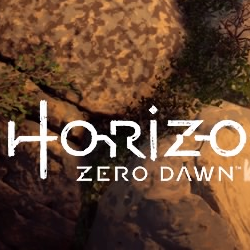

In [ ]:
img = cv2.imread(image + ext)
cv2_imshow(img)


In [ ]:
img.size

187500

In [ ]:
img.shape

(250, 250, 3)

In [ ]:
#img1=img.resize(28,28)

In [ ]:
import time
start_time=time.time()

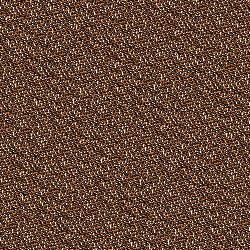

In [ ]:
ArnoldCatEncryptionIm = ArnoldCatEncryption(image + ext, key)
cv2_imshow(ArnoldCatEncryptionIm)

In [ ]:
end_time = time.time()
total_time = end_time - start_time
print("Time: ", total_time)

Time:  1.4627008438110352


In [ ]:
#ArnoldCatEncryptionIm=ArnoldCatEncryptionIm/255

In [ ]:
ArnoldCatEncryptionIm.size

187500

In [ ]:
from numpy import asarray
ArnoldCatEncryptionIm=asarray(ArnoldCatEncryptionIm)

In [ ]:
ArnoldCatEncryptionIm.shape

(250, 250, 3)

In [ ]:
ArnoldCatEn=ArnoldCatEncryptionIm.reshape(250,750)

In [ ]:
ArnoldCatEncryptionIm

array([[[ 27.,  50.,  95.],
        [250., 254., 255.],
        [ 23.,  41.,  82.],
        ...,
        [ 45.,  71., 118.],
        [ 68., 136., 211.],
        [ 64., 105., 167.]],

       [[ 22.,  20.,  32.],
        [197., 206., 220.],
        [  4.,  11.,  26.],
        ...,
        [ 54.,  63.,  90.],
        [245., 248., 255.],
        [ 55.,  77., 113.]],

       [[ 15.,  11.,  22.],
        [ 72.,  97., 139.],
        [ 62.,  99., 151.],
        ...,
        [ 52.,  99., 155.],
        [ 23.,  19.,  31.],
        [ 42.,  62., 103.]],

       ...,

       [[ 55.,  86., 141.],
        [ 57.,  94., 152.],
        [ 33.,  52.,  87.],
        ...,
        [ 75., 116., 171.],
        [ 15.,  11.,  23.],
        [ 11.,  15.,  26.]],

       [[  8.,  14.,  25.],
        [  8.,   7.,  16.],
        [  9.,  23.,  35.],
        ...,
        [ 38.,  65.,  99.],
        [ 40.,  37.,  53.],
        [ 10.,   8.,  27.]],

       [[ 29.,  68., 123.],
        [110., 167., 229.],
        [ 72., 1

In [ ]:
ArnoldCatEncryptionIm.size

187500

In [ ]:
import tensorflow.keras.layers
import tensorflow.keras.models

In [ ]:
encoding_dim=15
input_img=tensorflow.keras.layers.Input(shape=(img.size))

In [ ]:
input_img.shape

TensorShape([None, 187500])

In [ ]:
encoded=tensorflow.keras.layers.Dense(encoding_dim, activation='relu')(input_img)

In [ ]:
 # decoded representation of code
 decoded = tensorflow.keras.layers.Dense(ArnoldCatEncryptionIm.size, activation='sigmoid')(encoded)
 # Model which take input image and shows decoded images
 autoencoder = tensorflow.keras.models.Model(encoded, decoded)

In [ ]:
# This model shows encoded images
encoder = tensorflow.keras.models.Model(input_img, encoded)
 # Creating a decoder model
encoded_input = tensorflow.keras.layers.Input(shape=(encoding_dim,))
 # last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
 # decoder model
decoder = tensorflow.keras.models.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
decoder_layer(encoded_input)

<KerasTensor: shape=(None, 187500) dtype=float32 (created by layer 'dense_25')>

In [ ]:
decoder_layer

In [ ]:
encoded.shape

TensorShape([None, 15])

In [ ]:
input_img.shape

TensorShape([None, 187500])

In [ ]:
encoded_input.shape

TensorShape([None, 15])

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
img.shape

(250, 250, 3)

In [ ]:
img1=img.reshape(250,750)

# **Dense Neural Network**

This is a sequential deep neural network
we are implementing 'elu'and 'relu'activation functions for this dense neural network and 'accuracy'is the metrics calculated to measure the performance of this model.

categorical_crossentropy is the loss function and the neural network uses Adam optimization

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense
# Deep Learning Function
def deepml_model():
    # Model Creation
    deepml = Sequential()
    deepml.add(Dense(15, input_dim=750, activation='elu'))
    deepml.add(Dense(750, activation='relu'))
    # Model Compilation
    deepml.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return deepml

The image is converted to arrays, those array are made into batches of 3 with 100 epochs.  In an epoch, we use all of the data exactly once. A forward pass and a backward pass together are counted as one pass: An epoch is made up of one or more batches, where we use a part of the dataset to train the neural network

In [ ]:
history=deepml_model().fit(img1,ArnoldCatEn,batch_size=3,epochs=100)

Epoch 1/100
84/84 [==============================] - 1s 2ms/step - loss: 549854.8125 - accuracy: 0.0000e+00
Epoch 2/100
84/84 [==============================] - 0s 3ms/step - loss: 513716.8125 - accuracy: 0.0000e+00
Epoch 3/100
84/84 [==============================] - 0s 2ms/step - loss: 512373.7500 - accuracy: 0.0000e+00
Epoch 4/100
84/84 [==============================] - 0s 2ms/step - loss: 512200.2812 - accuracy: 0.0000e+00
Epoch 5/100
84/84 [==============================] - 0s 2ms/step - loss: 512104.7188 - accuracy: 0.0000e+00
Epoch 6/100
84/84 [==============================] - 0s 2ms/step - loss: 512052.4375 - accuracy: 0.0000e+00
Epoch 7/100
84/84 [==============================] - 0s 2ms/step - loss: 512022.6250 - accuracy: 0.0000e+00
Epoch 8/100
84/84 [==============================] - 0s 2ms/step - loss: 511976.0000 - accuracy: 0.0000e+00
Epoch 9/100
84/84 [==============================] - 0s 3ms/step - loss: 511975.5625 - accuracy: 0.0000e+00
Epoch 10/100
84/84 [========

In [ ]:
history=deepml_model().fit(ArnoldCatEn,ArnoldCatEn,batch_size=3,epochs=100)

Epoch 1/100
84/84 [==============================] - 1s 2ms/step - loss: 541120.0625 - accuracy: 0.0040
Epoch 2/100
84/84 [==============================] - 0s 2ms/step - loss: 475885.7500 - accuracy: 0.0040
Epoch 3/100
84/84 [==============================] - 0s 2ms/step - loss: 472542.4062 - accuracy: 0.0040
Epoch 4/100
84/84 [==============================] - 0s 2ms/step - loss: 470999.8125 - accuracy: 0.0040
Epoch 5/100
84/84 [==============================] - 0s 3ms/step - loss: 470785.3750 - accuracy: 0.0040
Epoch 6/100
84/84 [==============================] - 0s 2ms/step - loss: 470660.4062 - accuracy: 0.0040
Epoch 7/100
84/84 [==============================] - 0s 2ms/step - loss: 470267.8750 - accuracy: 0.0040
Epoch 8/100
84/84 [==============================] - 0s 2ms/step - loss: 469963.2188 - accuracy: 0.0000e+00
Epoch 9/100
84/84 [==============================] - 0s 2ms/step - loss: 469462.6562 - accuracy: 0.0000e+00
Epoch 10/100
84/84 [==============================] - 0s

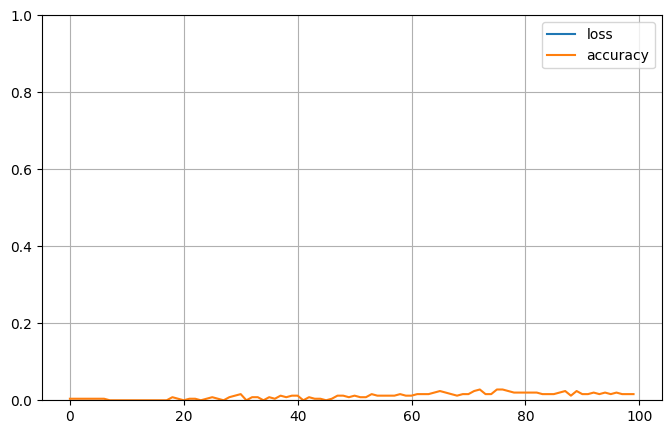

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
result1=deepml_model().evaluate(img1,ArnoldCatEn)

8/8 [==============================] - 0s 3ms/step - loss: 633520.2500 - accuracy: 0.0000e+00


In [ ]:
#autoencoder.fit(img,img,epochs=15,batch_size=256)

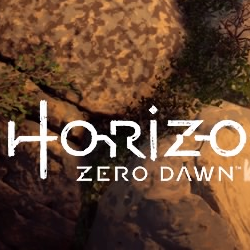

In [ ]:
ArnoldCatDecryptionIm = ArnoldCatDecryption(image + "_ArnoldcatEnc.png", key)
cv2_imshow(ArnoldCatDecryptionIm)

In [ ]:
ArnoldCatDecryptionIm.shape

(250, 250, 3)

In [ ]:
ArnoldCatDecryptionIm=ArnoldCatEncryptionIm.reshape(250,750)

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense
# Deep Learning Function
def deepml1_model():
    # Model Creation
    deepml1 = Sequential()
    deepml1.add(Dense(5, input_dim=750, activation='elu'))
    deepml1.add(Dense(750, activation='relu'))
    # Model Compilation
    deepml1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return deepml1

In [ ]:
history1=deepml1_model().fit(ArnoldCatEn,ArnoldCatDecryptionIm,batch_size=3,epochs=100)

Epoch 1/100
84/84 [==============================] - 1s 3ms/step - loss: 585694.6250 - accuracy: 0.0000e+00
Epoch 2/100
84/84 [==============================] - 0s 2ms/step - loss: 539077.1875 - accuracy: 0.0000e+00
Epoch 3/100
84/84 [==============================] - 0s 2ms/step - loss: 534664.8125 - accuracy: 0.0000e+00
Epoch 4/100
84/84 [==============================] - 0s 2ms/step - loss: 534164.7500 - accuracy: 0.0000e+00
Epoch 5/100
84/84 [==============================] - 0s 2ms/step - loss: 534298.1250 - accuracy: 0.0000e+00
Epoch 6/100
84/84 [==============================] - 0s 2ms/step - loss: 532059.5000 - accuracy: 0.0000e+00
Epoch 7/100
84/84 [==============================] - 0s 2ms/step - loss: 531815.3125 - accuracy: 0.0000e+00
Epoch 8/100
84/84 [==============================] - 0s 3ms/step - loss: 530947.3125 - accuracy: 0.0000e+00
Epoch 9/100
84/84 [==============================] - 0s 2ms/step - loss: 530900.6250 - accuracy: 0.0000e+00
Epoch 10/100
84/84 [========

In [ ]:
result2=deepml1_model().evaluate(ArnoldCatEn,ArnoldCatDecryptionIm)

8/8 [==============================] - 0s 3ms/step - loss: 638155.3750 - accuracy: 0.0000e+00


# Point to be observed: Since we are working with only single image, loss is too high and accuracy is negligible when it is fed to the deep neural network. Performance of the training improves when the network is trained with enough large datasets.

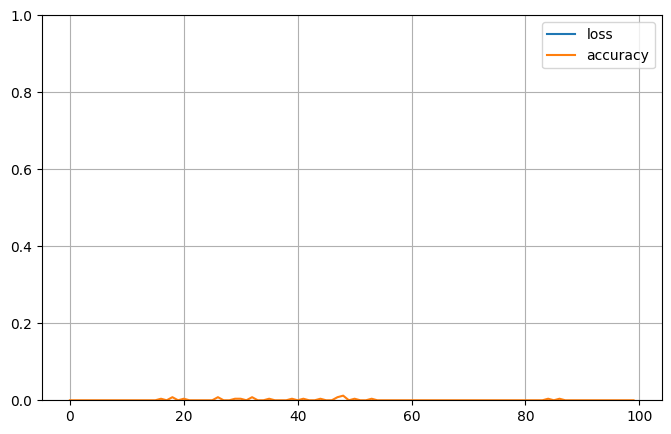

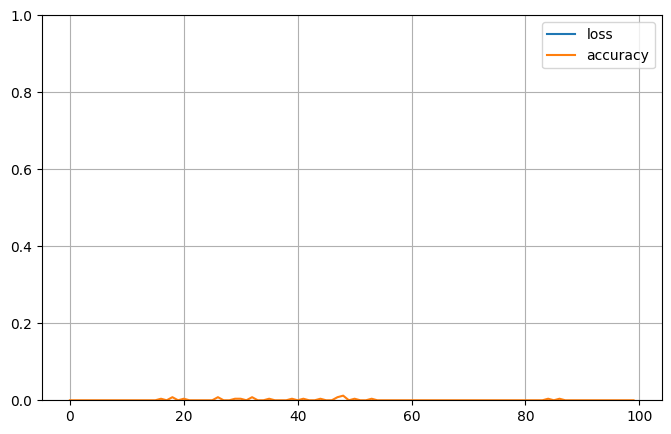

In [ ]:
import pandas as pd
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# **Histogram Analysis**

The ciphertext image histogram analysis is one of the most straight-forward methods ofillustrating the image encryption quality. A good image encryption method tends to encrypt a plaintext image to a random incomprehensible form. Thus a good image encyption technique generates a cipher image that has a uniformly distributed intensity histogram.

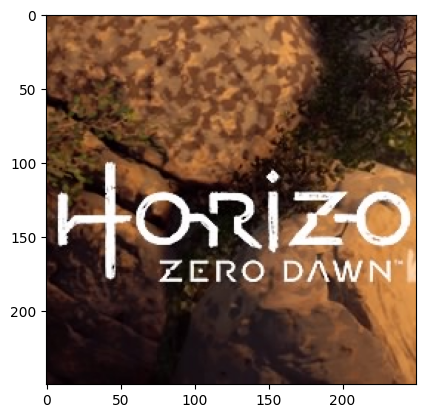

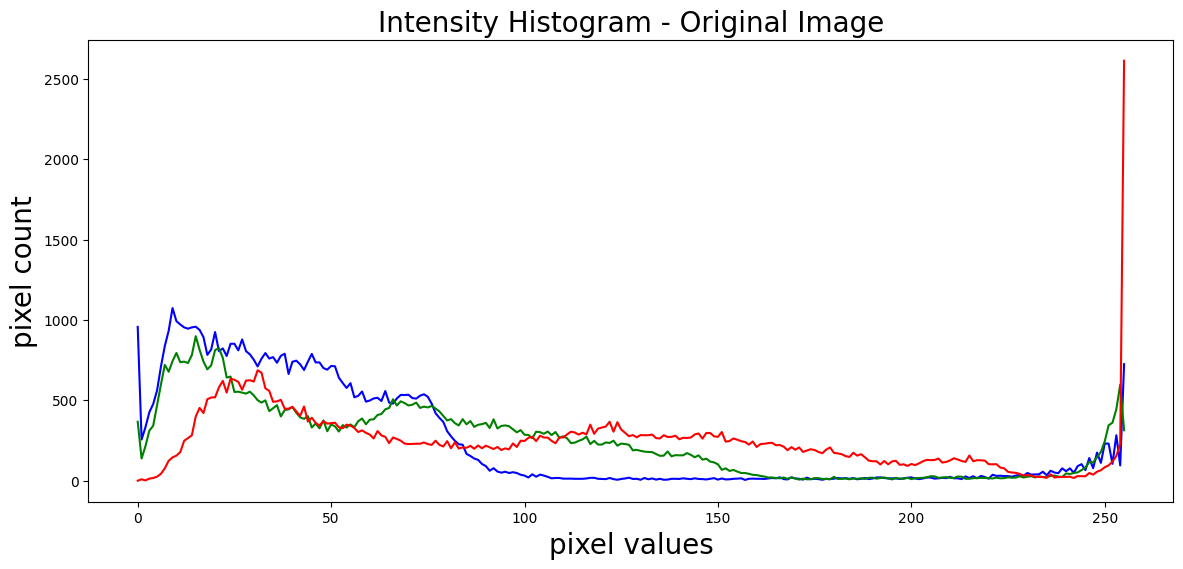

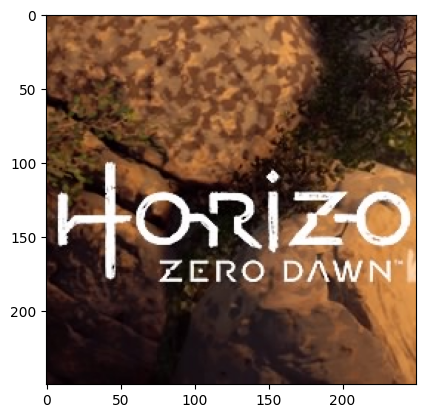

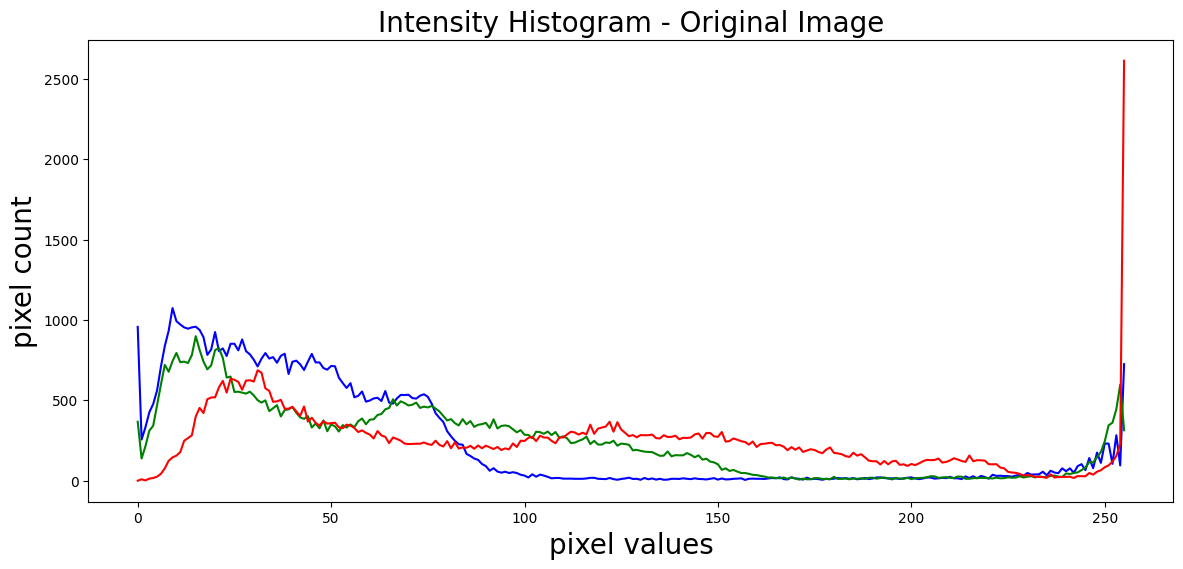

In [ ]:


image = "HorizonZero"
ext = ".png"
img = cv2.imread(image + ext,1)
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histogram_green, color='green')
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Original Image', fontsize=20)
plt.xlabel('pixel values', fontsize=20)
plt.ylabel('pixel count', fontsize=20)
plt.show()



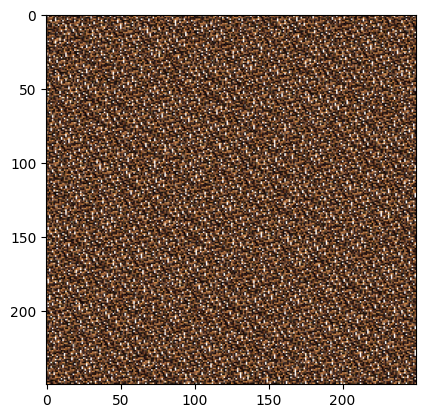

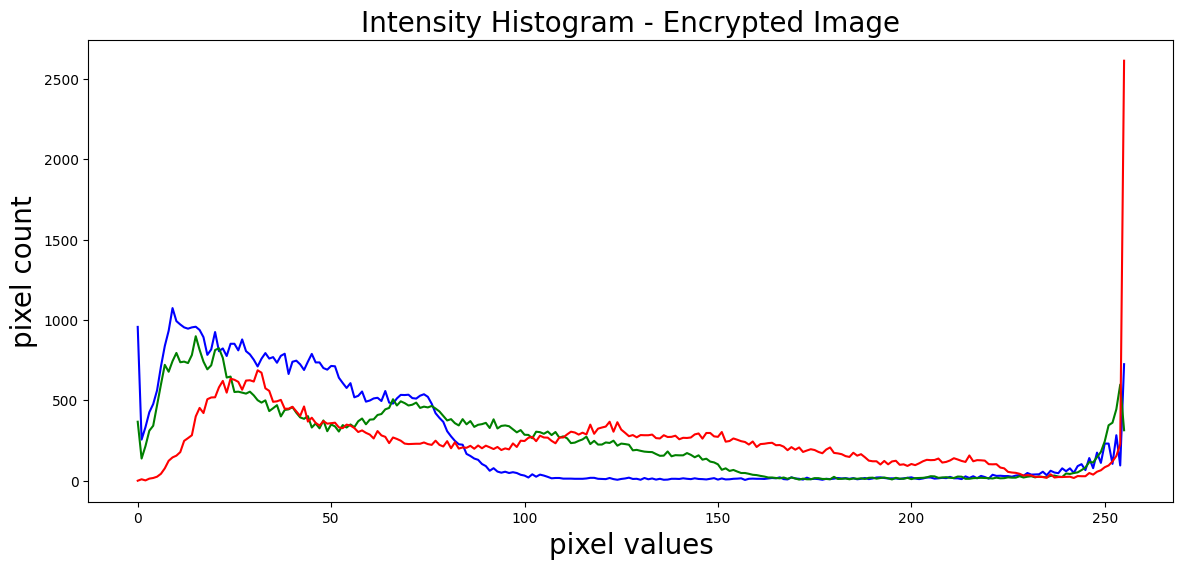

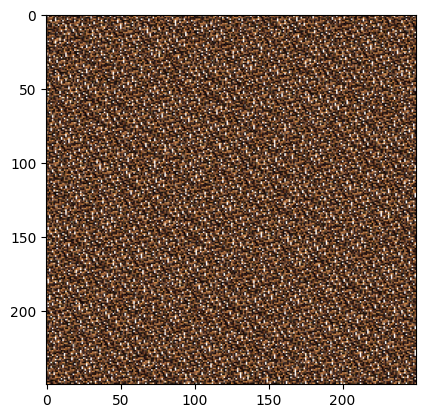

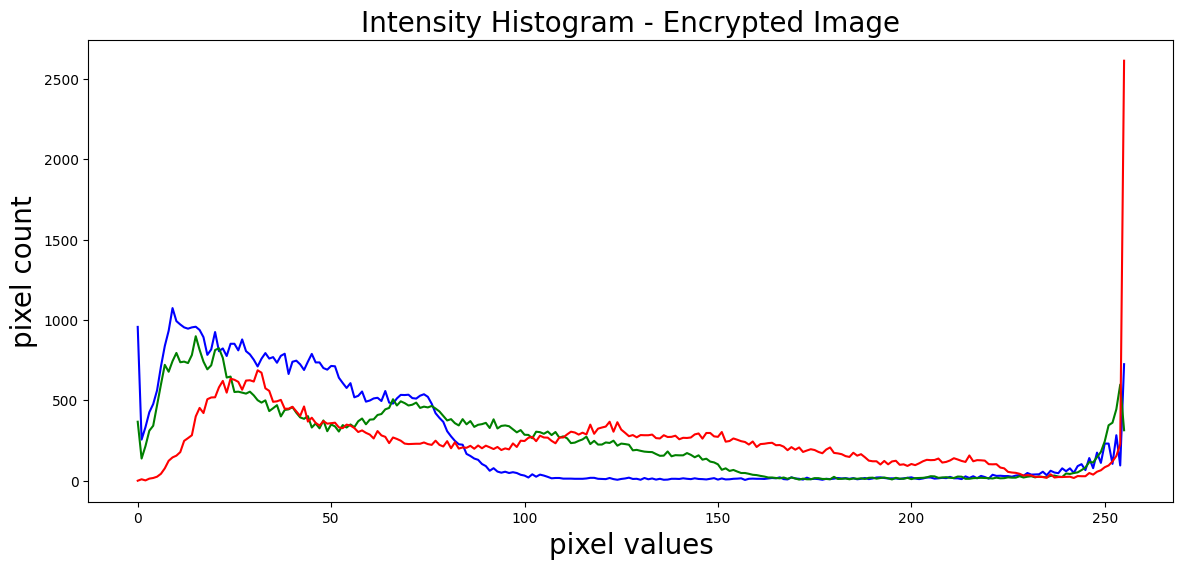

In [ ]:
#For encrypted image


image = "HorizonZero_ArnoldcatEnc"
ext = ".png"
img = cv2.imread(image + ext,1)
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

plt.figure(figsize=(14,6))
histogram_blue = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histogram_blue, color='blue')
histogram_green = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(histogram_green, color='green')
histogram_red = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(histogram_red, color='red')
plt.title('Intensity Histogram - Encrypted Image', fontsize=20)
plt.xlabel('pixel values', fontsize=20)
plt.ylabel('pixel count', fontsize=20)
plt.show()



# **Adjacent Pixel Autocorrelation**

Since images exhibit high information redundancy, it is desirable to have an encryption algorithm that breaks this redundancy. Thus as a metric of encryption performance we find the correlation between adjacent pixels in a direction (Horizontal, Vertical or Diagonal). We have considered the Horizontal direction.

1024 random pixels are picked up from the image and its correlation between it's rightmost neighbour is found and plotted. For a good algorithm, the correlation plot should appear random with no discernable pattern

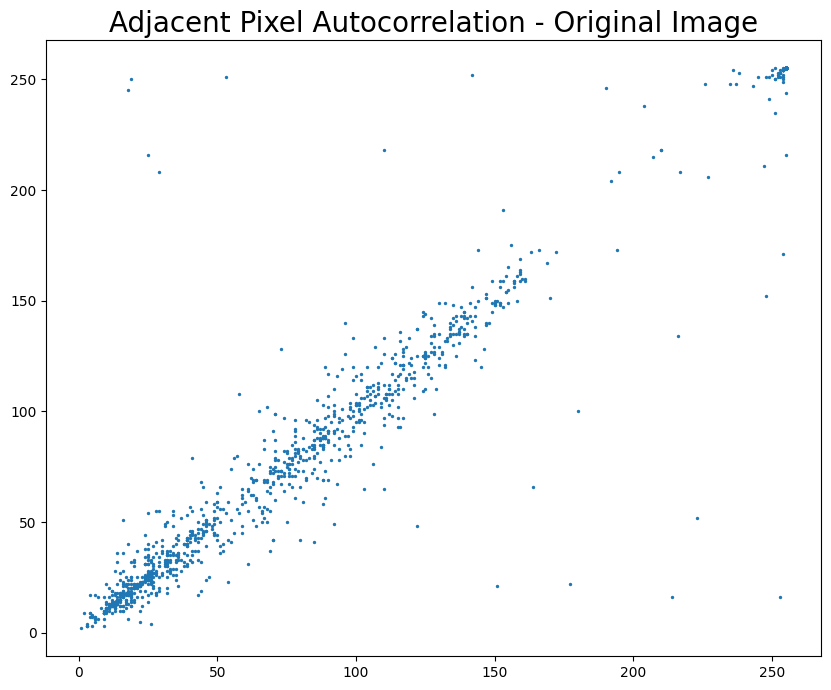

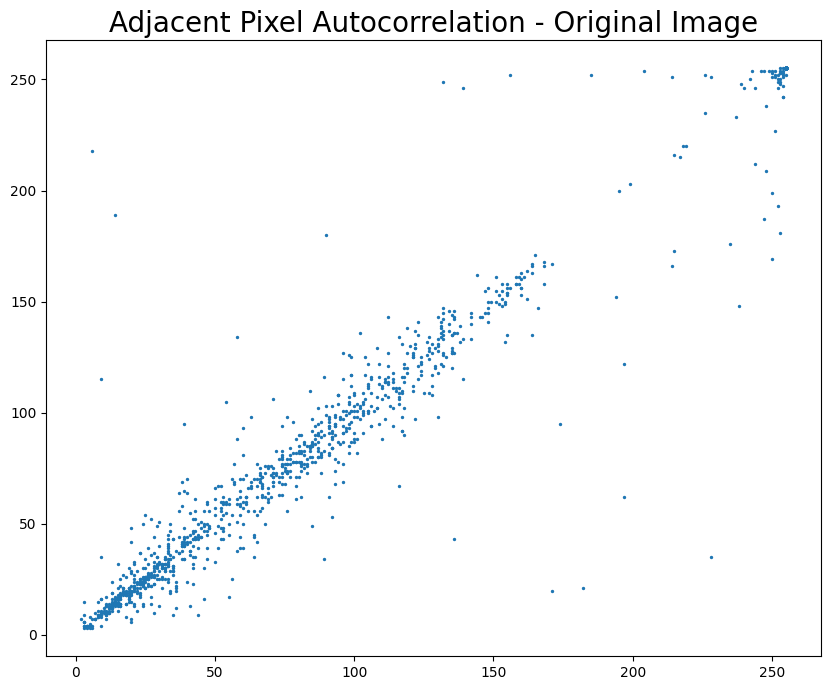

In [ ]:
image = "HorizonZero"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Original Image', fontsize=20)
plt.show()



250


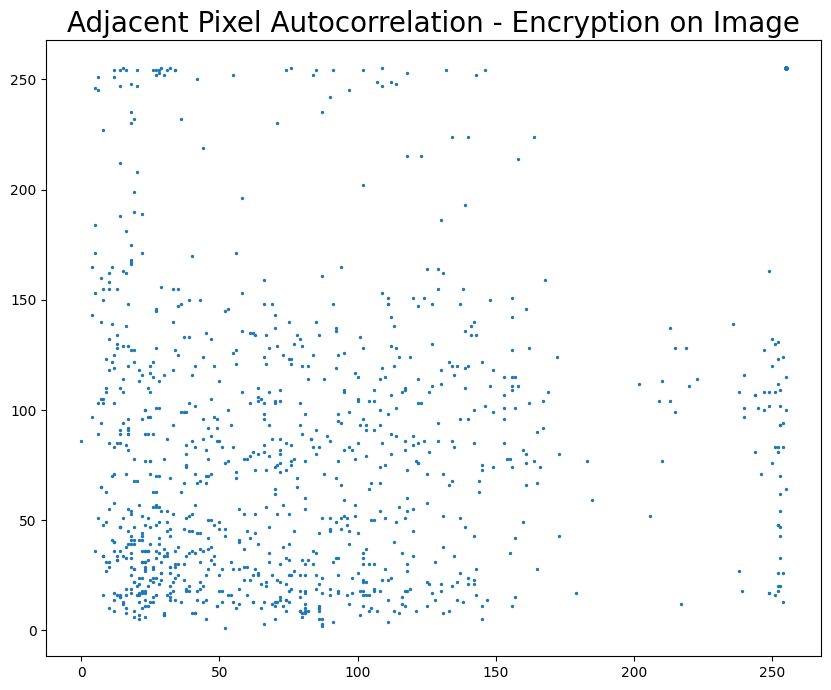

250


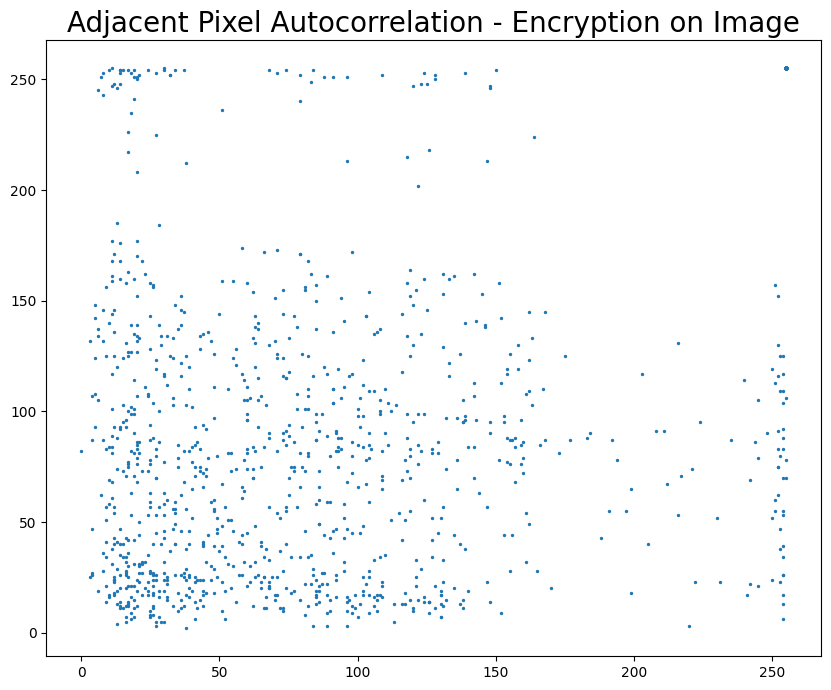

In [ ]:
image = "HorizonZero_ArnoldcatEnc"
ext = ".png"
ImageMatrix,image_size = getImageMatrix_gray(image+ext)
samples_x = []
samples_y = []
print(image_size)
for i in range(1024):
  x = random.randint(0,image_size-2)
  y = random.randint(0,image_size-1)
  samples_x.append(ImageMatrix[x][y])
  samples_y.append(ImageMatrix[x+1][y])
plt.figure(figsize=(10,8))
plt.scatter(samples_x,samples_y,s=2)
plt.title('Adjacent Pixel Autocorrelation - Encryption on Image', fontsize=20)
plt.show()

In [ ]:
end_time = time.time()
total_time = end_time - start_time
print("Time: ", total_time)

Time:  193.96187114715576
Time:  130.45232105255127


In [ ]:
image = "HorizonZero"
ext = ".png"
key = 20

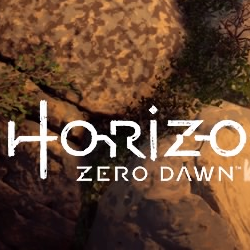

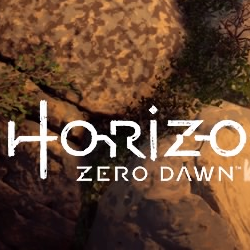

In [ ]:
img = cv2.imread(image + ext)
cv2_imshow(img)

In [ ]:
img.shape

(250, 250, 3)

(250, 250, 3)

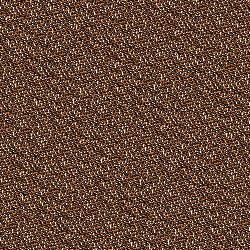

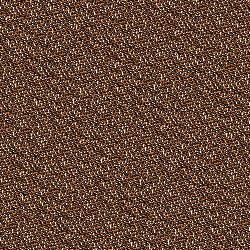

In [ ]:
ArnoldCatEncryptionIm = ArnoldCatEncryption(image+ext, key)
cv2_imshow(ArnoldCatEncryptionIm)

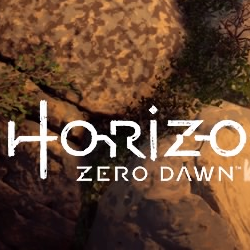

In [ ]:
ArnoldCatDecryptionIm = ArnoldCatDecryption(image + "_ArnoldcatEnc.png", key)
cv2_imshow(ArnoldCatDecryptionIm)

# **Calculating Structural Similarity Index**

In [ ]:
pip install scikit-image opencv-python imutils

scikit-image is a collection of algorithms for image processing and computer vision.

The Structural Similarity Index (SSIM) is a perceptual metric that quantifies image quality degradation* caused by processing such as data compression or by losses in data transmission.

In [ ]:
import skimage
from skimage.metrics import structural_similarity

numpy.squeeze() function is used when we want to remove single-dimensional entries from the shape of an array

In [ ]:
ArnoldCatEncryptionIm=np.squeeze(ArnoldCatEncryptionIm)

In [ ]:
ArnoldCatEncryptionIm.shape

(250, 250, 3)

In [ ]:
ArnoldCatDecryptionIm=np.squeeze(ArnoldCatDecryptionIm)

In [ ]:
ArnoldCatDecryptionIm.shape

(250, 250, 3)

np.full() function is used to return a new array of a given shape and data type filled with fill_value

In [ ]:
img=np.full((250,250,3), 12, np.uint8)

cv2.cvtColor() method is used to convert an image from one color space to another. In this case it is from color to grayscale

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
img.shape

(250, 250)

In [ ]:
ArnoldCatEncryptionIm = np.full((250,250,3), 12, np.uint8)

In [ ]:
encry = cv2.cvtColor(ArnoldCatEncryptionIm, cv2.COLOR_BGR2GRAY)

In [ ]:
encry.shape

(250, 250)

In [ ]:
ArnoldCatDecryptionIm = np.full((250,250,3), 12, np.uint8)

In [ ]:
decry = cv2.cvtColor(ArnoldCatDecryptionIm, cv2.COLOR_BGR2GRAY)

In [ ]:
decry.shape

(250, 250)

structural similarity is calculated between the original image, encrypted image and decrypted image

In [ ]:
diff1=structural_similarity(img,encry)

In [ ]:
diff1

1.0

In [ ]:
diff=structural_similarity(encry,decry)


Value as 1 refers that the encrypted and decrypted image remains the same. there is no loss of information

In [ ]:
diff

1.0

# **Key sensitivity**

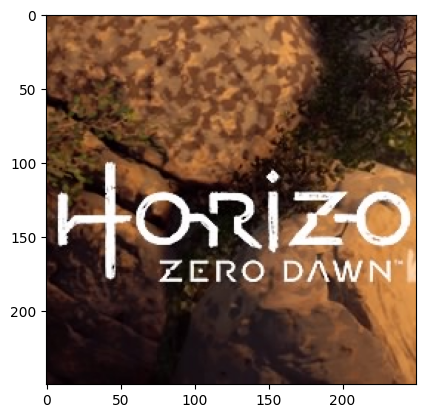

In [ ]:
#Original Image
image = "HorizonZero"
ext = ".png"
img = cv2.imread(image + ext,1)
pil_im = Image.open(image + ext, 'r')
imshow(np.asarray(pil_im))

# Arnold Cat
# Encrypt with key = 20

# New Section

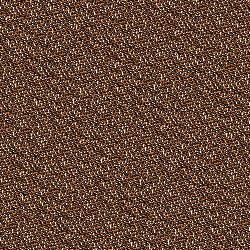

In [ ]:
ArnoldCatEncryptionIm = ArnoldCatEncryption(image + ext, 20)
cv2_imshow(ArnoldCatEncryptionIm)

# Decrypt with key = 18





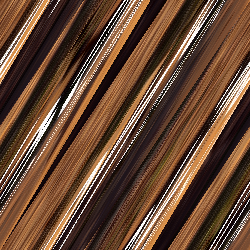

In [ ]:


ArnoldCatDecryptionIm = ArnoldCatDecryption(image + "_ArnoldcatEnc.png", 18)
cv2_imshow(ArnoldCatDecryptionIm)



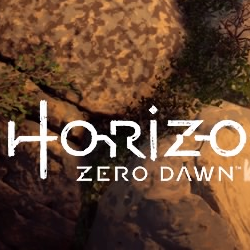

In [ ]:
img = cv2.imread(image + ext)
cv2_imshow(img)

In [ ]:
img2 = cv2.imread('HorizonZero_ArnoldcatEnc.png')

In [ ]:
psnr = cv2.PSNR(img, img2)
print(psnr)

9.222699309649162


In [ ]:
img3=cv2.imread('HorizonZero_ArnoldcatDec.png')

In [ ]:
psnr1 = cv2.PSNR(img2, img3)
print(psnr1)

9.233221913403016


In [ ]:
import skimage.measure
entropy = skimage.measure.shannon_entropy(img)
print(entropy)

7.4924423342698985


In [ ]:
entropy1 = skimage.measure.shannon_entropy(img2)
print(entropy1)

7.4924423342698985


In [ ]:
entropy2 = skimage.measure.shannon_entropy(img3)
print(entropy2)

7.4924423342698985
